<center><h1>Raisin Classification</h1></center>

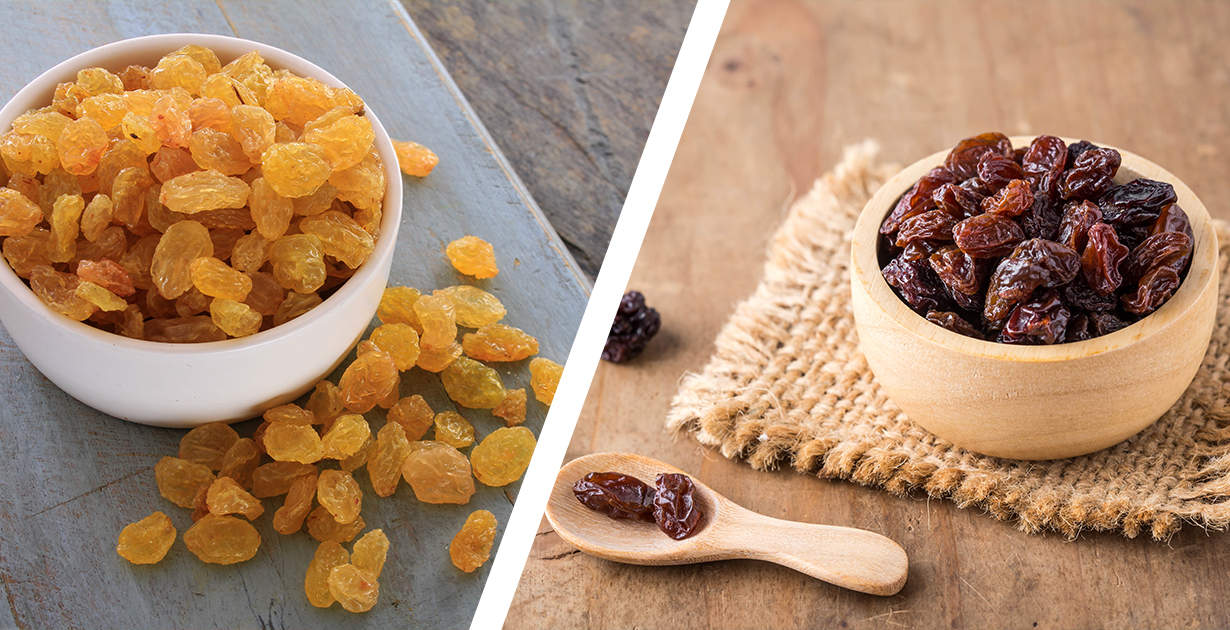

# by: Noura El-Mamlouk

In [113]:
##Importing libraries##
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import make_scorer, accuracy_score
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB

# 1)Data Preprocesing and EDA

## a) Data Loading

In [114]:
raisin = pd.read_csv("Raisin_Dataset (1).csv")
raisin.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen


In [115]:
raisin.shape

(900, 8)

## b) Data Cleaning

In [116]:
duplicates = raisin.duplicated()
print("Number of duplicates:", duplicates.sum())

Number of duplicates: 0


In [117]:
missing_values = raisin.isnull().sum()
print("Missing values:\n", missing_values)

Missing values:
 Area               0
MajorAxisLength    0
MinorAxisLength    0
Eccentricity       0
ConvexArea         0
Extent             0
Perimeter          0
Class              0
dtype: int64


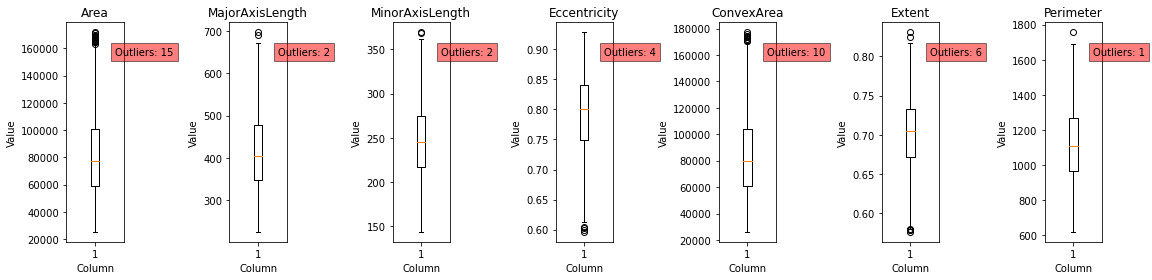

Number of Outliers Before Removing: Area               41
MajorAxisLength    17
MinorAxisLength    26
Eccentricity       43
ConvexArea         42
Extent             21
Perimeter          17
dtype: int64
Number of Outliers After Removing: Area               15
MajorAxisLength     2
MinorAxisLength     2
Eccentricity        4
ConvexArea         10
Extent              6
Perimeter           1
dtype: int64


(795, 8)

In [118]:
import matplotlib.pyplot as plt

# Define columns of interest
columns = ['Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity', 'ConvexArea', 'Extent', 'Perimeter']

# Calculate the IQR for each column
Q1 = raisin[columns].quantile(0.25)
Q3 = raisin[columns].quantile(0.75)
IQR = Q3 - Q1

# Define outlier threshold
outlier_threshold = 1.5

# Identify outliers in each column
outliers = ((raisin[columns] < (Q1 - outlier_threshold * IQR)) | (raisin[columns] > (Q3 + outlier_threshold * IQR)))

# Count the number of outliers in each column before removing
num_outliers_before = outliers.sum()

# Filter the DataFrame to remove outliers
raisin_filtered = raisin[~outliers.any(axis=1)]

# Calculate the IQR for each column after removing outliers
Q1_filtered = raisin_filtered[columns].quantile(0.25)
Q3_filtered = raisin_filtered[columns].quantile(0.75)
IQR_filtered = Q3_filtered - Q1_filtered

# Identify outliers in each column after removing
outliers_filtered = ((raisin_filtered[columns] < (Q1_filtered - outlier_threshold * IQR_filtered)) | (raisin_filtered[columns] > (Q3_filtered + outlier_threshold * IQR_filtered)))

# Count the number of outliers in each column after removing
num_outliers_after = outliers_filtered.sum()

# Create a boxplot for each column after removing outliers
fig, axs = plt.subplots(1, len(columns), figsize=(16, 4))

# Iterate over each column and plot the boxplot
for i, column in enumerate(columns):
    axs[i].boxplot(raisin_filtered[column])
    axs[i].set_title(column)
    axs[i].set_xlabel('Column')
    axs[i].set_ylabel('Value')
    axs[i].text(0.85, 0.85, f'Outliers: {num_outliers_after[column]}', transform=axs[i].transAxes, bbox=dict(facecolor='red', alpha=0.5))

plt.tight_layout()
plt.show()

# Output the number of outliers before and after removing
print("Number of Outliers Before Removing:", num_outliers_before)
print("Number of Outliers After Removing:", num_outliers_after)
raisin = raisin_filtered
raisin.shape

In [119]:
# Check for inconsistent values
for column in raisin.columns:
    unique_values = raisin[column].unique()

# Replace inconsistent values with the mean
raisin_cleaned = raisin.copy()

for column in raisin_cleaned.columns:
    if column != 'Class':  # Exclude the 'Class' column from modification
        mean_value = raisin_cleaned[column].mean()
        raisin_cleaned[column].replace(-1, mean_value, inplace=True)

# Verify the result
print("Dataset after handling inconsistent values:")
print(raisin_cleaned.head())
raisin= raisin_cleaned

Dataset after handling inconsistent values:
    Area  MajorAxisLength  MinorAxisLength  Eccentricity  ConvexArea  \
0  87524       442.246011       253.291155      0.819738       90546   
1  75166       406.690687       243.032436      0.801805       78789   
2  90856       442.267048       266.328318      0.798354       93717   
3  45928       286.540559       208.760042      0.684989       47336   
5  49242       318.125407       200.122120      0.777351       51368   

     Extent  Perimeter    Class  
0  0.758651   1184.040  Kecimen  
1  0.684130   1121.786  Kecimen  
2  0.637613   1208.575  Kecimen  
3  0.699599    844.162  Kecimen  
5  0.658456    881.836  Kecimen  


## c) Data Transformation

In [120]:
from sklearn.preprocessing import LabelEncoder
# Initialize the label encoder
label_encoder = LabelEncoder()
# Apply label encoding to the 'Class' column
raisin['Class'] = label_encoder.fit_transform(raisin['Class'])


In [121]:
raisin.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,1
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,1
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,1
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,1
5,49242,318.125407,200.122120,0.777351,51368,0.658456,881.836,1


In [122]:
# Summary statistics
print("Summary Statistics:")
print(raisin.describe())

Summary Statistics:
                Area  MajorAxisLength  MinorAxisLength  Eccentricity  \
count     795.000000       795.000000       795.000000    795.000000   
mean    82685.197484       419.662193       247.605251      0.790847   
std     31257.813387        95.470884        42.239791      0.066809   
min     25387.000000       225.629541       143.710872      0.596359   
25%     58949.000000       347.249548       216.722981      0.749021   
50%     77105.000000       403.909415       244.803889      0.800063   
75%    100742.000000       477.704334       275.238330      0.840699   
max    171749.000000       696.149046       369.286454      0.928094   

          ConvexArea      Extent    Perimeter       Class  
count     795.000000  795.000000   795.000000  795.000000  
mean    85710.872956    0.700641  1134.306253    0.513208  
std     32169.943577    0.044270   224.023387    0.500140  
min     26139.000000    0.576457   619.074000    0.000000  
25%     61190.000000    0.67160

In [123]:
# Define the columns to normalize
columns_to_normalize = ['Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity', 'ConvexArea']

# Initialize the scaler
scaler = MinMaxScaler()

# Perform min-max scaling on the selected columns
raisin_scaled = raisin.copy()
raisin_scaled[columns_to_normalize] = scaler.fit_transform(raisin[columns_to_normalize])

# Print the normalized dataset
print("Normalized Dataset:")
print(raisin_scaled.head())
raisin=raisin_scaled

Normalized Dataset:
       Area  MajorAxisLength  MinorAxisLength  Eccentricity  ConvexArea  \
0  0.424543         0.460377         0.485781      0.673368    0.426449   
1  0.340109         0.384811         0.440303      0.619309    0.348604   
2  0.447309         0.460422         0.543576      0.608905    0.447445   
3  0.140344         0.129455         0.288370      0.267173    0.140349   
5  0.162986         0.196582         0.250077      0.545594    0.167045   

     Extent  Perimeter  Class  
0  0.758651   1184.040      1  
1  0.684130   1121.786      1  
2  0.637613   1208.575      1  
3  0.699599    844.162      1  
5  0.658456    881.836      1  


## d) Data Reduction

In [124]:
# Assuming 'Perimeter' and 'Extent' are irrelevant attributes
raisin.drop(['Perimeter', 'Extent'], axis=1, inplace=True)
raisin.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Class
0,0.424543,0.460377,0.485781,0.673368,0.426449,1
1,0.340109,0.384811,0.440303,0.619309,0.348604,1
2,0.447309,0.460422,0.543576,0.608905,0.447445,1
3,0.140344,0.129455,0.288370,0.267173,0.140349,1
5,0.162986,0.196582,0.250077,0.545594,0.167045,1


In [125]:
raisin.shape

(795, 6)

In [126]:
# Summary statistics
print("Summary Statistics:")
print(raisin.describe())

Summary Statistics:
             Area  MajorAxisLength  MinorAxisLength  Eccentricity  ConvexArea  \
count  795.000000       795.000000       795.000000    795.000000  795.000000   
mean     0.391483         0.412380         0.460575      0.586276    0.394435   
std      0.213565         0.202905         0.187253      0.201392    0.213002   
min      0.000000         0.000000         0.000000      0.000000    0.000000   
25%      0.229308         0.258480         0.323670      0.460194    0.232078   
50%      0.353357         0.378900         0.448156      0.614057    0.357245   
75%      0.514854         0.535737         0.583075      0.736553    0.517923   
max      1.000000         1.000000         1.000000      1.000000    1.000000   

            Class  
count  795.000000  
mean     0.513208  
std      0.500140  
min      0.000000  
25%      0.000000  
50%      1.000000  
75%      1.000000  
max      1.000000  


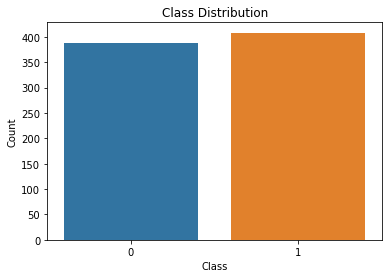

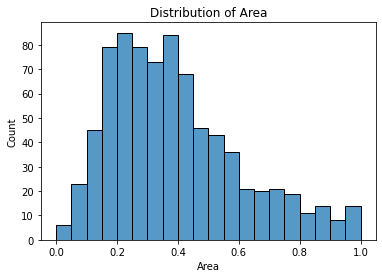

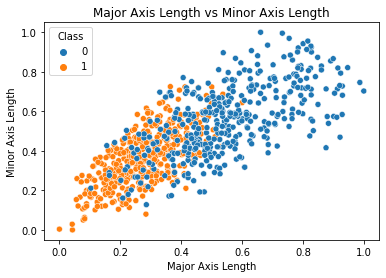

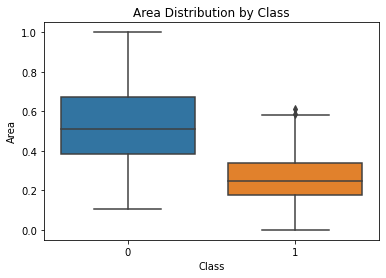

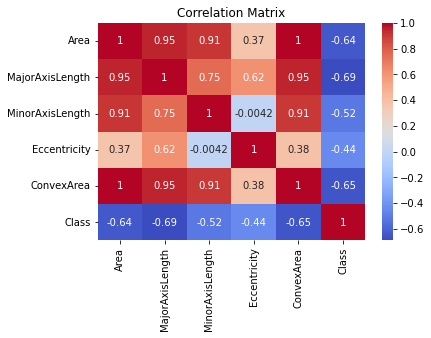

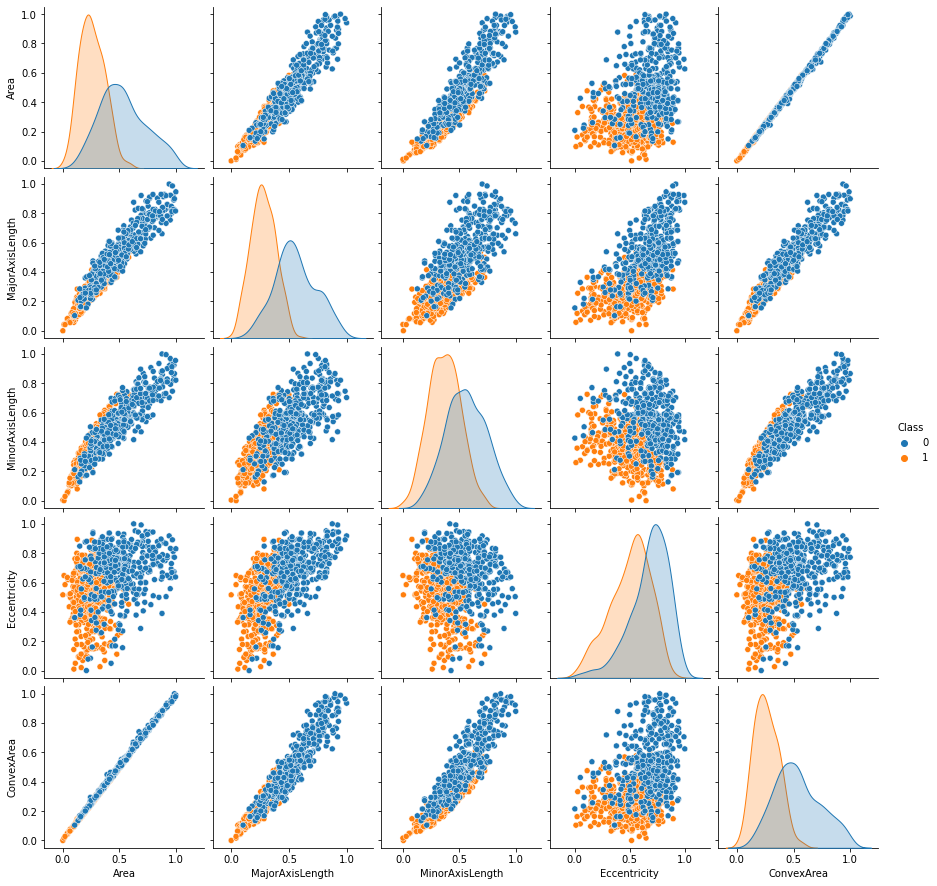

In [127]:
# Bar plot
sns.countplot(data=raisin, x='Class')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

# Histogram
sns.histplot(data=raisin, x='Area', bins=20)
plt.title('Distribution of Area')
plt.xlabel('Area')
plt.ylabel('Count')
plt.show()

# Scatter plot
sns.scatterplot(data=raisin, x='MajorAxisLength', y='MinorAxisLength', hue='Class')
plt.title('Major Axis Length vs Minor Axis Length')
plt.xlabel('Major Axis Length')
plt.ylabel('Minor Axis Length')
plt.show()

# Box plot
sns.boxplot(data=raisin, x='Class', y='Area')
plt.title('Area Distribution by Class')
plt.xlabel('Class')
plt.ylabel('Area')
plt.show()

# Correlation matrix heatmap
corr_matrix = raisin.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Pairwise scatter plot matrix
sns.pairplot(data=raisin, vars=['Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity', 'ConvexArea'], hue='Class')
plt.show()

# 2) Supervised Machine Learning

In [128]:
from sklearn.model_selection import GridSearchCV
def preprocess_and_compare(raisin, num_samples):
    """
    Preprocess the data and compare the performance of KNN, Decision Tree, and Naïve Bayes classifiers.
    
    Parameters:
    raisin (DataFrame): The original dataframe containing the raisin data.
    num_samples (int): The number of samples to be taken from the "Besni" class.
    
    Returns:
    None
    """

    # Randomly select the specified number of samples from the "Besni" class
    sample_of_besni = besni.sample(n=num_samples, random_state=42)

    # Concatenate the sampled "Besni" class with the "Kecimen" class to create the new dataframe
    new_df = pd.concat([sample_of_besni, kecimen], axis=0)

    # Split the data into features and labels
    X = new_df.iloc[:, :-1]
    y = new_df.iloc[:, -1]

    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, shuffle=True, random_state=42)

    compare_classifiers(X_train, X_test, y_train, y_test)
def compare_classifiers(X_train, X_test, y_train, y_test):
    """
    Compare the performance of KNN, Decision Tree, and Naïve Bayes classifiers with hyperparameter tuning.
    
    Parameters:
    X_train (ndarray): The training input samples.
    X_test (ndarray): The testing input samples.
    y_train (ndarray): The training target samples.
    y_test (ndarray): The testing target samples.
    
    Returns:
    None
    """

    classifiers = {
        'KNN': {
            'model': KNeighborsClassifier(),
            'params': {'n_neighbors': [3, 5, 7]}
        },
        'Decision Tree': {
            'model': DecisionTreeClassifier(),
            'params': {'max_depth': [None, 3, 5]}
        },
        'Naïve Bayes': {
            'model': GaussianNB(),
            'params': {}
        }
    }

    results = []
    for name, classifier in classifiers.items():
        # Perform hyperparameter tuning using GridSearchCV
        model = GridSearchCV(classifier['model'], classifier['params'], cv=5)
        model.fit(X_train, y_train)

        # Make predictions on the test set using the best estimator
        y_pred = model.best_estimator_.predict(X_test)

        # Calculate performance metrics
        accuracy = metrics.accuracy_score(y_test, y_pred)
        precision = metrics.precision_score(y_test, y_pred)
        recall = metrics.recall_score(y_test, y_pred)
        f1 = metrics.f1_score(y_test, y_pred)
        results.append({'classifier': name, 'accuracy': accuracy})

        # Print the metrics
        print(f"{name} Accuracy: {accuracy:.3f}")
        print(f"{name} Precision: {precision:.3f}")
        print(f"{name} Recall: {recall:.3f}")
        print(f"{name} F1: {f1:.3f}")

        # Create the confusion matrix
        cm = metrics.confusion_matrix(y_test, y_pred)

        # Plot the confusion matrix
        plt.figure()
        sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square=True, cmap='Blues_r')
        plt.ylabel('Actual label')
        plt.xlabel('Predicted label')
        plt.title(f'{name} Confusion Matrix')
        plt.show()

    # Visualize the accuracy of each classifier
    plt.figure(figsize=(10, 6))
    sns.barplot(x="classifier", y="accuracy", data=pd.DataFrame(results))
    plt.ylim(0, 1)
    plt.ylabel("Accuracy")
    plt.title("Classifier Accuracy Comparison")
    plt.show()

    highest_accuracy = max(results, key=lambda x: x['accuracy'])
    print(f"The classifier with the highest accuracy is {highest_accuracy['classifier']} with an accuracy of {highest_accuracy['accuracy']:.3f}")

    lowest_accuracy = min(results, key=lambda x: x['accuracy'])
    print(f"The classifier with the lowest accuracy is {lowest_accuracy['classifier']} with an accuracy of {lowest_accuracy['accuracy']:.3f}")


KNN Accuracy: 0.902
KNN Precision: 0.885
KNN Recall: 1.000
KNN F1: 0.939


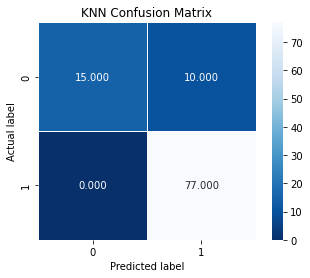

Decision Tree Accuracy: 0.912
Decision Tree Precision: 0.905
Decision Tree Recall: 0.987
Decision Tree F1: 0.944


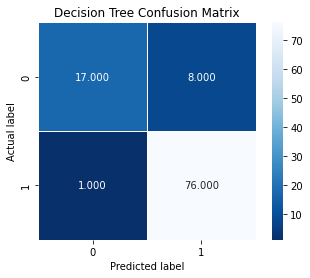

Naïve Bayes Accuracy: 0.941
Naïve Bayes Precision: 0.928
Naïve Bayes Recall: 1.000
Naïve Bayes F1: 0.963


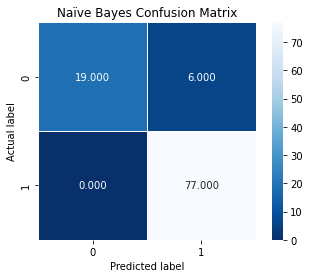

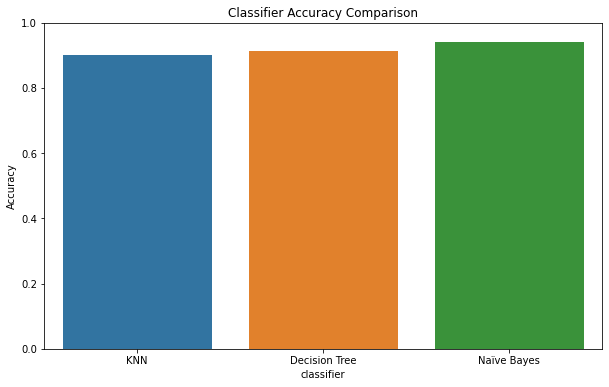

The classifier with the highest accuracy is Naïve Bayes with an accuracy of 0.941
The classifier with the lowest accuracy is KNN with an accuracy of 0.902


In [129]:
preprocess_and_compare(raisin, 100)

KNN Accuracy: 0.844
KNN Precision: 0.839
KNN Recall: 0.936
KNN F1: 0.885


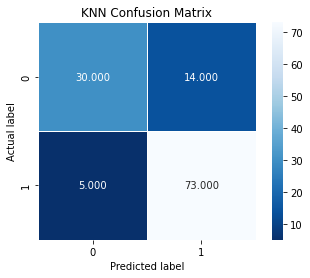

Decision Tree Accuracy: 0.869
Decision Tree Precision: 0.878
Decision Tree Recall: 0.923
Decision Tree F1: 0.900


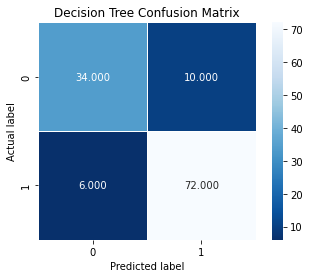

Naïve Bayes Accuracy: 0.869
Naïve Bayes Precision: 0.860
Naïve Bayes Recall: 0.949
Naïve Bayes F1: 0.902


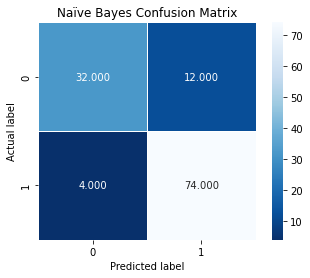

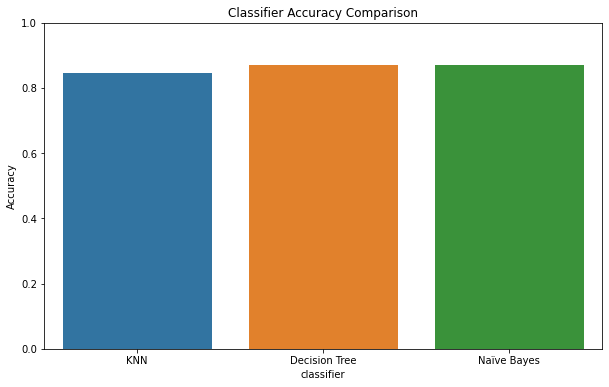

The classifier with the highest accuracy is Decision Tree with an accuracy of 0.869
The classifier with the lowest accuracy is KNN with an accuracy of 0.844


In [130]:
preprocess_and_compare(raisin, 200)

KNN Accuracy: 0.824
KNN Precision: 0.787
KNN Recall: 0.921
KNN F1: 0.848


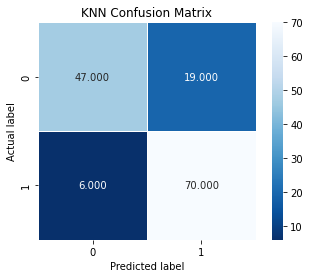

Decision Tree Accuracy: 0.866
Decision Tree Precision: 0.870
Decision Tree Recall: 0.882
Decision Tree F1: 0.876


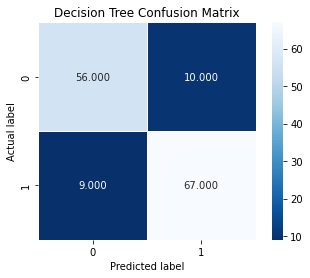

Naïve Bayes Accuracy: 0.852
Naïve Bayes Precision: 0.831
Naïve Bayes Recall: 0.908
Naïve Bayes F1: 0.868


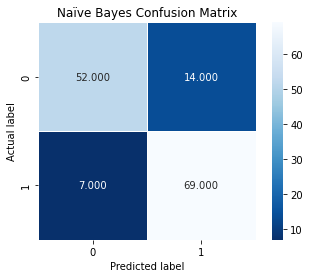

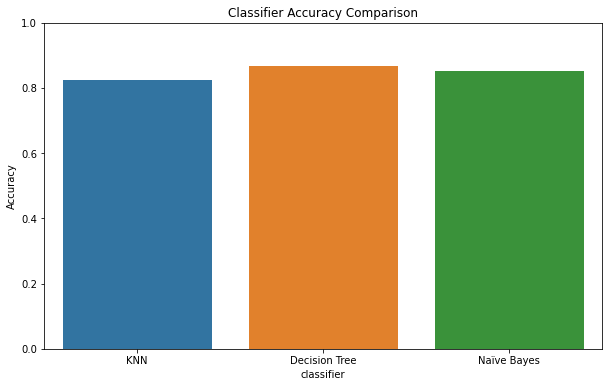

The classifier with the highest accuracy is Decision Tree with an accuracy of 0.866
The classifier with the lowest accuracy is KNN with an accuracy of 0.824


In [131]:
preprocess_and_compare(raisin, 300)